In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'pepidev'
os.environ['KAGGLE_KEY'] = '982c120e8dea60a4a016b383ea4749f7'

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

 98% 573M/587M [00:07<00:00, 139MB/s]
100% 587M/587M [00:07<00:00, 85.8MB/s]


In [ ]:
!kaggle datasets download -d tamimresearch/weather-image-dataset

 96% 235M/246M [00:02<00:00, 109MB/s]
100% 246M/246M [00:02<00:00, 99.7MB/s]


In [ ]:
!unzip -q weather-dataset.zip

replace dataset/dew/2208.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -q weather-image-dataset.zip

In [ ]:
!mv dataset train

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((224,224)),   # 이미지 파일 크기변경
        transforms.RandomAffine(0,shear=10, scale=(0.8,1.2)),
        # 수평으로 뒤집기
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224,224)),   # 이미지 파일 크기변경
        transforms.ToTensor()
    ])
}

In [ ]:
def target_transforms(target):
  return torch.FloatTensor([target])

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train'], target_transform=target_transforms),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'], target_transform=target_transforms)
}

FileNotFoundError: [Errno 2] No such file or directory: 'validation'

In [ ]:
dataloaders = {
    'train' : DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation' : DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

In [ ]:
print(len(image_datasets['train']), len(image_datasets['validation']))

6862 3116


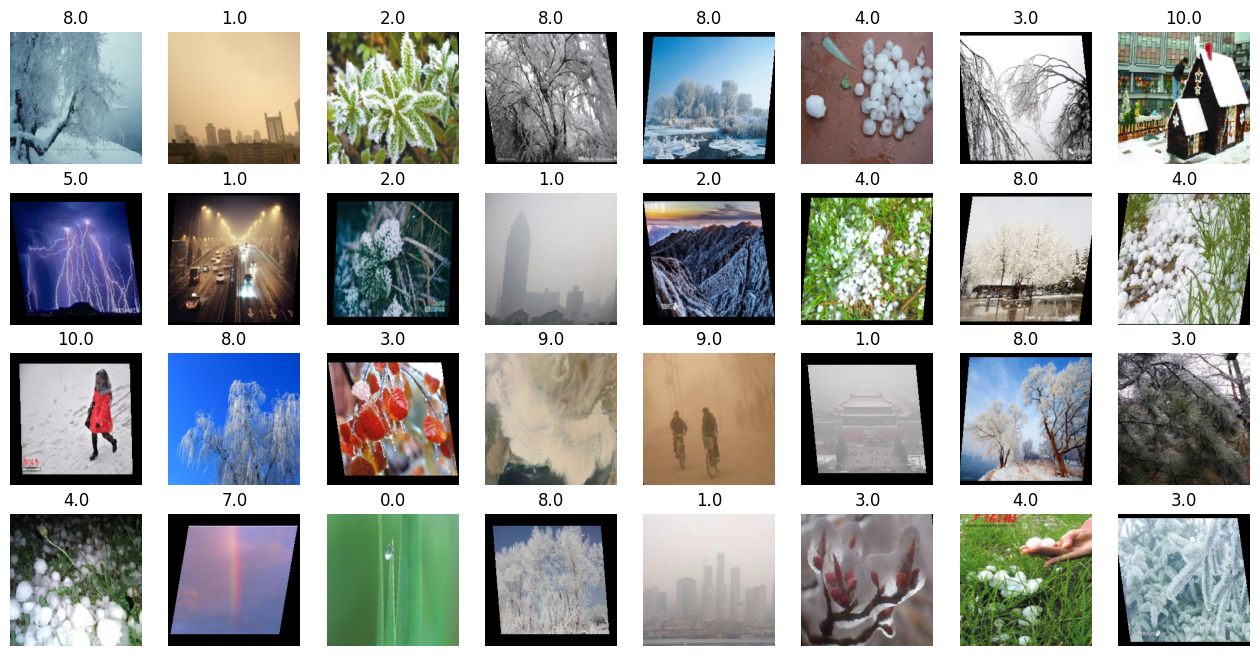

In [ ]:
imgs, labels = next(iter(dataloaders['train']))

fig,axes = plt.subplots(4,8, figsize=(16,8))

for ax, img, label in zip(axes.flatten(),imgs, labels):
  # print(img.shape)
  ax.imshow(img.permute(1,2,0))
  ax.set_title(label.item())
  ax.set_title(label.item())
  ax.axis('off')

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

# Set Kaggle credentials
os.environ['KAGGLE_USERNAME'] = 'pepidev'
os.environ['KAGGLE_KEY'] = '982c120e8dea60a4a016b383ea4749f7'

# Download and unzip the dataset
!kaggle datasets download -d jehanbhathena/weather-dataset
!unzip -q weather-dataset.zip
!mkdir train
!mv dataset/* train/

# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Define data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
}

# Define target transformations
def target_transform(target):
    return torch.FloatTensor([target])

# Load the dataset
data_dir = 'train'
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train'], target_transform=target_transform)
}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=64, shuffle=True, num_workers=4)
               for x in ['train']}

# Load the pre-trained Xception model
model = models.xception(pretrained=True)
# Modify the classifier for your specific problem
model.fc = nn.Linear(model.fc.in_features, 1)  # Assuming it's a binary classification problem

# Move the model to GPU if available
model = model.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloaders[phase].dataset)
        print(f'{phase} Loss: {epoch_loss}')

# Save the trained model
torch.save(model.state_dict(), 'xception_weather_model.pth')


weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace dataset/dew/2208.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: mkdir: cannot create directory ‘train’: File exists
mv: cannot move 'dataset/dew' to 'train/dew': Directory not empty
mv: cannot move 'dataset/fogsmog' to 'train/fogsmog': Directory not empty
mv: cannot move 'dataset/frost' to 'train/frost': Directory not empty
mv: cannot move 'dataset/glaze' to 'train/glaze': Directory not empty
mv: cannot move 'dataset/hail' to 'train/hail': Directory not empty
mv: cannot move 'dataset/lightning' to 'train/lightning': Directory not empty
mv: cannot move 'dataset/rain' to 'train/rain': Directory not empty
mv: cannot move 'dataset/rainbow' to 'train/rainbow': Directory not empty
mv: cannot move 'dataset/rime' to 'train/rime': Directory not empty
mv: cannot move 'dataset/sandstorm' to 'train/sandstorm': Directory not empty
mv: cannot move 'dataset/snow' to 'train/snow': Directory not e

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


AttributeError: module 'torchvision.models' has no attribute 'xception'